# Predicting Car Prices

The purpose of this project is to use the machine learning workflow to predict a car's market price using its attributes. We will use the information about the technical aspects of the car such as motor displacement, miles per gallon, vehicle weight and more. In this Project, we are going to implement the K-nearest neighbors algorithm to predict car prices.

## Data Source

Collecting data takes significant amount of time and energy. So we must always try to find relevant existing data. We are going to use the automobile dataset from the UCI Machine Learning Repository.

The following is the link to the dataset: [automobile](https://archive.ics.uci.edu/ml/datasets/automobile)

We will begin by taking a look at the data.

## Exploring the Dataset

In [1]:
import pandas as pd
import numpy as np
# Reading the dataset to a dataframe #
car_df = pd.read_csv("imports-85.data")
car_df.head(5)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


### Renaming columns

We can see that column names don't match with the ones in the dataset documentation. We are going to fix this by renaming the columns to match the __[dataset documentation](https://archive.ics.uci.edu/ml/datasets/automobile)__.

In [2]:
# Renaming the column names #
columns = ["symboling","normalized-losses","make","fuel-type"," aspiration","num-of-doors","body-style",
           "drive-wheels","engine-location","wheel-base","length","width","height","curb-weight",
           "engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio",
           "horsepower","peak-rpm","city-mpg","highway-mpg","price"]
cars = pd.read_csv("imports-85.data",names = columns)
cars.head(0)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [3]:
cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Now we will explore the columns having continuous values according to the __[dataset documentation](https://archive.ics.uci.edu/ml/datasets/automobile)__.

In [4]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore',
                          'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_columns = cars[continuous_values_cols]

numeric_columns

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,109.1,188.8,68.9,55.5,2952,3.78,3.15,9.5,114,5400,23,28,16845
201,95,109.1,188.8,68.8,55.5,3049,3.78,3.15,8.7,160,5300,19,25,19045
202,95,109.1,188.8,68.9,55.5,3012,3.58,2.87,8.8,134,5500,18,23,21485
203,95,109.1,188.8,68.9,55.5,3217,3.01,3.40,23.0,106,4800,26,27,22470


## Data Cleaning

Most of the columns have a proper format to their data. However, above we can see that `normalized_losses` contains the question mark character. Below, we will take care of this formatting issue. Then we will change the type of all the columns to float in order to use the data effectively.

In [5]:
# replacing the missing values with nan values #
numeric_columns = numeric_columns.replace("?", np.nan)
numeric_columns

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,109.1,188.8,68.9,55.5,2952,3.78,3.15,9.5,114,5400,23,28,16845
201,95,109.1,188.8,68.8,55.5,3049,3.78,3.15,8.7,160,5300,19,25,19045
202,95,109.1,188.8,68.9,55.5,3012,3.58,2.87,8.8,134,5500,18,23,21485
203,95,109.1,188.8,68.9,55.5,3217,3.01,3.40,23.0,106,4800,26,27,22470


In [6]:
numeric_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


In [7]:
# Converting the columns to float types 
numeric_columns = numeric_columns.astype(float)
numeric_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 22.5 KB


### Missing Values

In order for our algorithm to work properly we need to be sure we have no missing values. We will look for missing values and then evaluate whether to drop them or fill them in with an appropriate value in order to create our model properly.

In [8]:
numeric_columns.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Our target column will be `price`. There are rows with missing prices and
we will therefore drop those rows.

In [9]:
#Remove missing values from price column 
numeric_columns = numeric_columns.dropna(subset = ["price"])
numeric_columns.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

All of the columns we are using for our model are  numeric and continuous. We will thus replace any missing values with the mean of the corresponding column.

In [10]:
# Filling the missing values using the average value of the corresponding column 
numeric_columns = numeric_columns.fillna(numeric_columns.mean())
#check for nulls
print(numeric_columns.isnull().sum())

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


### Normalizing the Data

We will now normalize all the data columns with the exception of the target column `price` using min-max normalization. 

In [11]:
price_col = numeric_columns["price"]
numeric_columns = (numeric_columns - numeric_columns.min())/(numeric_columns.max() - numeric_columns.min())
numeric_columns["price"] = price_col
numeric_columns

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.157068,0.655977,0.711940,0.735043,0.641667,0.567882,0.885714,0.514286,0.15625,0.308411,0.510204,0.277778,0.315789,16845.0
201,0.157068,0.655977,0.711940,0.726496,0.641667,0.605508,0.885714,0.514286,0.10625,0.523364,0.469388,0.166667,0.236842,19045.0
202,0.157068,0.655977,0.711940,0.735043,0.641667,0.591156,0.742857,0.380952,0.11250,0.401869,0.551020,0.138889,0.184211,21485.0
203,0.157068,0.655977,0.711940,0.735043,0.641667,0.670675,0.335714,0.633333,1.00000,0.271028,0.265306,0.361111,0.289474,22470.0


## Univariate Model

We will start our modelling using the univariate (having only one column as a feature) k-nearest neighbor model for each possible feature. Initially, we will set our k value to the default of 5 and observe the RMSE of each column. Then we will vary the k value, observe and plot the results. Scikit-learn will be used to implement the algorithm.

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target, df):
    # Shuffle the order of the rows in the dataframe #
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    new_df = df.reindex(shuffled_index)
    
    # Split the data into training and test datasets #
    split_index = int(len(new_df)/2)
    training_data = new_df.iloc[0:split_index]
    test_data = new_df.iloc[split_index:]
    
    # Instantiate a k neighbor instance #
    knn = KNeighborsRegressor()
    
    # fit a model to the training data #
    knn.fit(training_data[[train_col]], training_data[target])
    
    # Predict target value using the model #
    predictions = knn.predict(test_data[[train_col]])
    
    # calculate the rmse values #
    mse = mean_squared_error(test_data[target], predictions)
    rmse = np.sqrt(mse)
    return rmse

rmse_values = dict()
train_cols = numeric_columns.columns.drop("price")

for val in train_cols:
    rmse_val = knn_train_test(val,"price", numeric_columns)
    rmse_values[val] = rmse_val

# convert the dictionary to a series 
rmse_series = pd.Series(rmse_values)
rmse_series.sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-ratio    6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In the case above, we used the default k value of 5. Now, we are going to test the model with a variety of k (number of neighbors used) values.
The following is the set of k values that we will use to train the model : [1, 3, 5, 7, 9]. We will examine the RMSEs of each feature using each k value and view the results graphically.

In [13]:
def knn_train_test(train_col, target, df):
    # Shuffle the order of the rows in the dataframe #
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    new_df = df.reindex(shuffled_index)
    
    # Split the data into training and test datasets #
    split_index = int(len(new_df)/2)
    training_data = new_df.iloc[0:split_index]
    test_data = new_df.iloc[split_index:]
    k_values = [1,3,5,7,9]
    k_rmses  = dict()
    
    for val in k_values:
    # Instantiate a k neighbor instance #
        knn = KNeighborsRegressor(n_neighbors = val)
    
    # fit a model to the training data #
        knn.fit(training_data[[train_col]], training_data[target])
    
    # Predict target value using the model #
        predictions = knn.predict(test_data[[train_col]])
    
    # calculate the rmse values #
        mse = mean_squared_error(test_data[target], predictions)
        rmse = np.sqrt(mse)
        k_rmses[val] = rmse
    return k_rmses

k_rmse_values = dict()
train_cols = numeric_columns.columns.drop("price")

for val in train_cols:
    rmse_val = knn_train_test(val,"price", numeric_columns)
    k_rmse_values[val] = rmse_val
    
k_rmse_values

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'stroke': {1: 9116.495955406906,
  3: 7338.68466990294,
  5: 8006

Now we will visualize the RMSE values on a scatter plot.

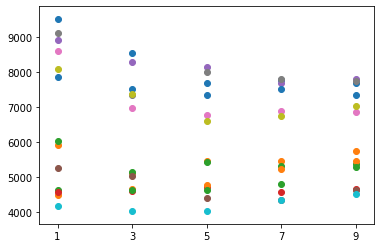

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

k_values = [1,3,5,7,9]
for k, v in k_rmse_values.items():
    x = k_values
    y = list(v.values())
    
    plt.scatter(x, y)
    plt.xlabel = 'k value'
    plt.xticks(k_values, ['1', '3', '5', '7', '9'])
    plt.ylabel = 'RMSE'  

## Multivariate Model

Now that we have a function that works well with individual columns, the next step is to modify it to work with multiple features.

### Feature Optimization

We will begin by looking at the average RMSE for each feature column across the varying k values we used above and sort them by RMSE value.

In [15]:
# calculating average of rmse values #
avg_rmse_values = dict()
for key,val in k_rmse_values.items():
    rmse_avg = np.mean(list(val.values()))
    avg_rmse_values[key] = rmse_avg
series_avg_rmse = pd.Series(avg_rmse_values)
series_avg_rmse.sort_values()

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-ratio    7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

We will begin optimizing our model by varying the amount of features we are using and examining the different RMSE values. We will start using the two features with the lowest RMSE above and add additional features until we reach a total of six features.

In [16]:
def knn_train_test(train_col, target, df):
    # Shuffle the order of the rows in the dataframe #
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    new_df = df.reindex(shuffled_index)
    
    # Split the data into training and test datasets #
    split_index = int(len(new_df)/2)
    training_data = new_df.iloc[0:split_index]
    test_data = new_df.iloc[split_index:]
    k_values = [5]
    k_rmses  = dict()
    
    for val in k_values:
    # Instantiate a k neighbor instance #
        knn = KNeighborsRegressor(n_neighbors = val)
    
    # fit a model to the training data #
        knn.fit(training_data[train_col], training_data[target])
    
    # Predict target value using the model #
        predictions = knn.predict(test_data[train_col])
    
    # calculate the rmse values #
        mse = mean_squared_error(test_data[target], predictions)
        rmse = np.sqrt(mse)
        k_rmses[val] = rmse
    return k_rmses

rmse_values = dict()
best_two_features = ["horsepower", "width"]
rmse_val = knn_train_test(best_two_features, "price", numeric_columns)
rmse_values["best_two_features"] = rmse_val

best_three_features = ["horsepower", "width","curb-weight"]
rmse_val = knn_train_test(best_three_features, "price", numeric_columns)
rmse_values["best_three_features"] = rmse_val

best_four_features = ["horsepower", "width", "curb-weight", "highway-mpg"]
rmse_val = knn_train_test(best_four_features, "price", numeric_columns)
rmse_values["best_four_features"] = rmse_val

best_five_features = ["horsepower", "width", "curb-weight", "highway-mpg", "length"]
rmse_val = knn_train_test(best_five_features, "price", numeric_columns)
rmse_values["best_five_features"] = rmse_val

best_six_features = ["horsepower", "width", "curb-weight", "highway-mpg", "length", 'city-mpg']
rmse_val = knn_train_test(best_six_features, "price", numeric_columns)
rmse_values["best_six_features"] = rmse_val

rmse_values

{'best_two_features': {5: 3589.3132622073304},
 'best_three_features': {5: 3305.9401397969677},
 'best_four_features': {5: 3358.6915801682458},
 'best_five_features': {5: 3665.546673045813},
 'best_six_features': {5: 3628.261188214127}}

## Hyperparameter Optimization

Now that we have examined the number of features we might like to use in our model, we will examine different possible k values. We will use the three different feature combinations with the lowest RMSE above, the two, three and four feature combinations. We will then examine and plot the RMSE results varying k from 1 to 25.

In [17]:
def knn_train_test(train_col, target, df):
    # Shuffle the order of the rows in the dataframe #
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    new_df = df.reindex(shuffled_index)
    
    # Split the data into training and test datasets #
    split_index = int(len(new_df)/2)
    training_data = new_df.iloc[0:split_index]
    test_data = new_df.iloc[split_index:]
    k_values = [x for x in range(1,26)]
    k_rmses  = dict()
    
    for val in k_values:
    # Instantiate a k neighbor instance #
        knn = KNeighborsRegressor(n_neighbors = val)
    
    # fit a model to the training data #
        knn.fit(training_data[train_col], training_data[target])
    
    # Predict target value using the model #
        predictions = knn.predict(test_data[train_col])
    
    # calculate the rmse values #
        mse = mean_squared_error(test_data[target], predictions)
        rmse = np.sqrt(mse)
        k_rmses[val] = rmse
    return k_rmses

rmse_values = dict()
best_two_features = ["horsepower", "width"]
rmse_val = knn_train_test(best_two_features, "price", numeric_columns)
rmse_values["best_two_features"] = rmse_val

best_three_features = ["horsepower", "width","curb-weight"]
rmse_val = knn_train_test(best_three_features, "price", numeric_columns)
rmse_values["best_three_features"] = rmse_val

best_four_features = ["horsepower", "width", "curb-weight", "highway-mpg"]
rmse_val = knn_train_test(best_four_features, "price", numeric_columns)
rmse_values["best_four_features"] = rmse_val

rmse_values

{'best_two_features': {1: 4061.9613050304106,
  2: 3497.49936199118,
  3: 3402.8692636542114,
  4: 3587.0044198356923,
  5: 3589.3132622073304,
  6: 3680.062981095498,
  7: 3756.92796407086,
  8: 3937.770418264052,
  9: 4078.3485919700097,
  10: 4163.828373808731,
  11: 4297.135962941241,
  12: 4370.753019740529,
  13: 4500.462028689254,
  14: 4604.156707686779,
  15: 4595.345097101211,
  16: 4605.433669910023,
  17: 4611.2845838376215,
  18: 4598.88218482117,
  19: 4579.964891966457,
  20: 4653.966845712387,
  21: 4759.076059393234,
  22: 4807.805949321809,
  23: 4865.320887129985,
  24: 4910.715769042787,
  25: 4921.936353813013},
 'best_three_features': {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 4201.10713385948,
  13: 4303.62676861325,
  14: 4359.693296

Here we will visualize these RMSE values on a graph.

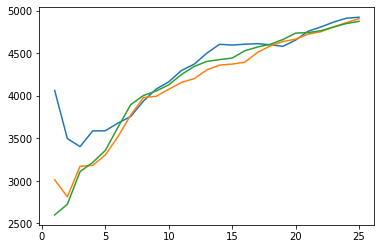

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

for key, val in rmse_values.items():
    x = list(val.keys())
    y = list(val.values())
    plt.plot(x,y)
    plt.xlabel = "k-values"
    plt.ylabel = "RMSE"

The optimal k value for the top three models are as follows:
- Model with two features : k = 3, RMSE = 3403
- Model with three features : k = 2, RMSE = 2813
- Model with four features : k = 1, RMSE = 2600

We will now use this information to implement k-fold cross validation. We will first work on establishing k-fold cross validation with the four best features and k = 1. 

In [19]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = [2, 3, 4, 5, 6, 7, 8, 9, 10]
feature_sets = [best_two_features, best_three_features, best_four_features]

for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor(n_neighbors =1)
    #for feature in feature_sets:
        
    mses = cross_val_score(model, numeric_columns[best_four_features], numeric_columns["price"],
                           scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    print('best_four_features', str(fold), "folds: ", "avg RMSE: ", str(round(avg_rmse, 2)), "std RMSE: ",
          str(round(std_rmse, 2)))

best_four_features 2 folds:  avg RMSE:  3303.38 std RMSE:  680.73
best_four_features 3 folds:  avg RMSE:  2790.2 std RMSE:  271.2
best_four_features 4 folds:  avg RMSE:  2675.08 std RMSE:  421.85
best_four_features 5 folds:  avg RMSE:  2479.02 std RMSE:  405.51
best_four_features 6 folds:  avg RMSE:  2518.23 std RMSE:  482.71
best_four_features 7 folds:  avg RMSE:  2473.79 std RMSE:  481.3
best_four_features 8 folds:  avg RMSE:  2582.45 std RMSE:  652.97
best_four_features 9 folds:  avg RMSE:  2398.05 std RMSE:  675.1
best_four_features 10 folds:  avg RMSE:  2415.57 std RMSE:  752.0


Now that we have this, we can modify our `knn_train_test()` function to perform k-fold cross validation. We will then look at results of the three best feature sets using their established optimum k value. Our data here has around 200 rows, therefore we don't need to try a high number of folds. We have chosen 10 folds as a maximum so each fold will have at least 20 rows of data. Our variance is also very likely to climb quickly as we increase folds due to having fewer rows in each fold. At this point, we will also include the data cleaning steps we established earlier into our train and test function.

In [20]:
from sklearn.model_selection import cross_val_score, KFold

def knn_train_test(features, k, target, df):
    #cleaning the data
    continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore',
                          'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
    df = df[continuous_values_cols]
    df = df.replace("?", np.nan)
    df =df.astype(float)
    df = df.dropna(subset = [target])
    df = df.fillna(df.mean())
    target_col = df[target]
    df = (df - df.min())/(df.max() - df.min())
    df[target] = target_col
    
    # Shuffle the order of the rows in the dataframe #
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    new_df = df.reindex(shuffled_index)
    
    # Split the data into train and test sets with differing folds
    num_folds = [2, 3, 4, 5, 6, 7, 8, 9, 10]
    
    for fold in num_folds:
        kf = KFold(fold, shuffle=True, random_state=1)
        model = KNeighborsRegressor(n_neighbors = k)
        mses = cross_val_score(model, numeric_columns[features], numeric_columns[target],
                           scoring="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.absolute(mses))
        avg_rmse = np.mean(rmses)
        std_rmse = np.std(rmses)
        print(str(fold), "folds ", "avg RMSE: ", str(round(avg_rmse, 2)), "std RMSE: ",
            str(round(std_rmse, 2)))
    
    
    return avg_rmse, std_rmse

best_two_features = ["horsepower", "width"]
print('best two features: k=3')
rmse_val = knn_train_test(best_two_features,3, "price", cars)
print('\n')

best_three_features = ["horsepower", "width","curb-weight"]
print('best three features: k=2')
rmse_val = knn_train_test(best_three_features, 2, "price", cars)
print('\n')

best_four_features = ["horsepower", "width", "curb-weight", "highway-mpg"]
print('best four features: k=1')
rmse_val = knn_train_test(best_four_features, 1, "price", cars)

best two features: k=3
2 folds  avg RMSE:  3517.31 std RMSE:  128.33
3 folds  avg RMSE:  3221.77 std RMSE:  214.52
4 folds  avg RMSE:  3247.54 std RMSE:  387.05
5 folds  avg RMSE:  3179.34 std RMSE:  423.72
6 folds  avg RMSE:  3172.36 std RMSE:  652.47
7 folds  avg RMSE:  3226.27 std RMSE:  634.01
8 folds  avg RMSE:  3145.13 std RMSE:  722.17
9 folds  avg RMSE:  3125.74 std RMSE:  626.19
10 folds  avg RMSE:  3183.01 std RMSE:  674.79


best three features: k=2
2 folds  avg RMSE:  2903.3 std RMSE:  76.08
3 folds  avg RMSE:  2877.28 std RMSE:  349.42
4 folds  avg RMSE:  2834.22 std RMSE:  696.29
5 folds  avg RMSE:  2768.86 std RMSE:  729.75
6 folds  avg RMSE:  2702.62 std RMSE:  813.86
7 folds  avg RMSE:  2786.36 std RMSE:  739.29
8 folds  avg RMSE:  2650.27 std RMSE:  1015.45
9 folds  avg RMSE:  2606.14 std RMSE:  895.64
10 folds  avg RMSE:  2676.53 std RMSE:  979.9


best four features: k=1
2 folds  avg RMSE:  3303.38 std RMSE:  680.73
3 folds  avg RMSE:  2790.2 std RMSE:  271.2
4 fold

## Conclusion

We have followed a machine learning workflow in this project. We used the K-nearest neighbor algorithm to predict car prices on a test set of data. We used both train/test validation and k-fold cross validation. Along the way we discovered that the more features we used to train our data, the lower our optimum value for k was in our K-nearest neighbor algorithm. 

We ended with a variety of models with varying bias and variance scores. It is beyond the scope of what we are accomplishing here to find the best model. Had this been the goal, more time would have been spent in the feature optimization. Other optimization strategies beyond just lowest RMSE, such as feature correlation would have been considered. Given the results we do currently have, it appears using a model with four features and a k value of 1 looks the most promising to optimize further.